In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from _functions import *
from statsmodels.tsa.vector_ar.var_model import VAR
import statsmodels.api as sm

In [2]:
df = pd.read_csv('macro40.csv')
df.shape

(194, 41)

In [3]:
df.iloc[:166,:]


,Date,GDP251,PI074,FYFF,PSCCOMR,FMRNBA,FMRRA,FM2,GDP252,IPS10,...,GDP265,LBMNU,PMNO,CCINRV,BUSLOANS,PMP,GDP276_1,GDP270,GDP253,LHEL
0,8\1\1959,-0.000330,0.001489,0.493333,-0.007571,0.008627,0.005680,-0.000583,0.004858,-0.018137,...,0.005418,-0.001278,53.133333,0.003077,0.003760,57.700000,-0.001208,0.005053,0.008791,2.333333
1,11\1\1959,0.001526,0.000383,0.413333,-0.010176,0.003427,-0.005818,-0.004344,0.000615,0.002073,...,-0.004739,0.000064,54.633333,-0.000185,-0.008727,54.666667,0.000923,-0.001508,-0.022649,-1.000000
2,2\1\1960,0.009555,-0.002226,-0.056667,-0.005150,-0.001055,-0.003578,0.000771,0.003894,0.025426,...,-0.008728,0.002671,56.700000,-0.005746,0.004165,60.966667,-0.001471,0.002819,0.014531,0.333333
3,5\1\1960,-0.002173,0.002208,-0.236667,0.005803,0.008811,0.002436,0.001192,0.005321,-0.009527,...,0.003504,0.000769,49.000000,0.001586,-0.001413,47.766667,-0.000003,0.002818,0.009901,-2.666667
4,8\1\1960,0.000680,-0.002358,-0.760000,-0.005607,0.011305,0.013191,0.004197,-0.001791,-0.007201,...,0.010387,-0.002468,50.600000,-0.004718,-0.007513,49.500000,0.000894,-0.000642,-0.003457,-2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,11\1\1999,0.007650,-0.000024,0.213333,0.004081,0.015405,0.012931,-0.000313,0.005336,0.008453,...,0.006909,0.001380,61.566667,-0.000703,0.005273,60.166667,0.000175,0.005100,0.003000,1.000000
162,2\1\2000,0.001101,0.001084,0.370000,-0.011413,-0.001227,-0.001315,0.000891,0.006864,0.005087,...,-0.003276,0.001775,58.433333,0.000170,-0.001285,58.800000,0.001364,0.005939,0.023713,3.000000
163,5\1\2000,0.006767,-0.000885,0.596667,0.008636,-0.010992,-0.008576,0.000317,0.002733,0.005220,...,0.005864,0.000185,52.300000,0.002121,0.003614,55.966667,-0.000859,0.004456,-0.010822,-4.333333
164,8\1\2000,-0.000498,0.000560,0.246667,-0.022770,0.005419,0.005433,-0.002085,0.004167,-0.000332,...,-0.002261,-0.000086,50.300000,0.005473,-0.003459,51.633333,0.000213,0.002269,0.006327,-5.333333


In [4]:
df.iloc[166:,:]

,Date,GDP251,PI074,FYFF,PSCCOMR,FMRNBA,FMRRA,FM2,GDP252,IPS10,...,GDP265,LBMNU,PMNO,CCINRV,BUSLOANS,PMP,GDP276_1,GDP270,GDP253,LHEL
166,2\1\2001,-0.000535,0.001049,-0.880000,-0.000195,-0.002948,-0.003076,0.005038,0.001785,-0.006420,...,0.005635,-0.000741,39.933333,-0.002255,0.000257,40.133333,0.000265,0.001669,0.007044,-5.000000
167,5\1\2001,0.001332,-0.001100,-1.266667,0.005440,0.009335,0.013196,-0.000540,0.001088,-0.005908,...,0.008208,-0.004604,46.066667,-0.001553,-0.007867,43.833333,0.000715,0.000565,-0.000320,-11.000000
168,8\1\2001,-0.001531,-0.001810,-0.830000,0.004592,0.061749,0.071089,-0.001069,0.001909,-0.006398,...,-0.001693,-0.005140,51.600000,-0.001126,-0.003846,50.200000,-0.000248,0.000205,0.003289,-6.666667
169,11\1\2001,0.001711,-0.001550,-1.363333,-0.042590,-0.083058,-0.104982,-0.000119,0.007306,-0.005533,...,0.008855,-0.005064,46.466667,0.007461,-0.003135,45.966667,-0.000174,0.004585,0.034477,-8.333333
170,2\1\2002,0.002937,0.001710,-0.400000,0.004794,0.008638,0.019662,-0.001826,0.001524,0.002663,...,0.004604,-0.003783,59.900000,-0.005878,0.000252,55.833333,0.000067,0.000799,-0.004691,0.000000
171,5\1\2002,0.002357,0.002017,0.016667,0.007967,-0.009466,-0.008429,-0.004466,0.002536,0.006189,...,0.005060,0.000800,60.966667,-0.001429,0.002228,59.866667,-0.000990,0.002401,0.003865,0.000000
172,8\1\2002,0.002551,-0.001068,-0.010000,0.024035,0.014507,0.015454,0.004804,0.002427,0.002304,...,0.002446,-0.001316,51.800000,-0.002213,0.000680,55.000000,-0.000312,0.001974,0.011858,-3.333333
173,11\1\2002,0.000220,0.000227,-0.296667,0.008853,0.011553,0.008986,0.000789,0.001522,-0.000383,...,0.005077,0.000543,53.566667,-0.001983,0.001895,52.633333,-0.000118,0.001740,-0.005772,-3.000000
174,2\1\2003,0.001299,0.001884,-0.193333,0.016055,0.009896,0.009334,-0.002477,0.002226,0.003141,...,-0.001505,-0.002505,52.433333,0.002612,-0.003430,51.566667,-0.000278,0.001169,0.000452,0.666667
175,5\1\2003,0.003702,-0.005155,-0.003333,0.000173,-0.014721,-0.012579,0.002124,0.003873,-0.003295,...,0.006472,-0.001262,51.400000,0.000672,0.002537,51.833333,-0.001038,0.005361,0.016845,-3.333333


In [5]:
print(df.columns)

cat1 = ['GDP251  ', 'GDP252  ', 'GDP253  ', 'GDP256  ', 'GDP263  ', 'GDP264  ', 'GDP265  ', 'GDP270  ']
cat2 = ['PMCP    ', 'PMDEL   ', 'PMI     ', 'PMNO    ', 'PMNV    ', 'PMP     ']
cat3 = ['IPS10   ', 'UTL11   ']
cat4 = ['HSFR    ']
cat5 = ['BUSLOANS', 'CCINRV  ', 'FM1     ', 'FM2', 'FMRNBA  ', 'FMRRA   ', 'FSPIN   ', 'FYFF    ', 'FYGT10  ', 'Sfygt10']
cat6 = ['CES002  ', 'LBMNU   ', 'LBOUT   ', 'LHEL    ', 'LHUR    ']
cat7 = ['CES275R  ', 'PI074   ', 'GDP273  ','GDP276_1', 'PSCCOMR ', 'PWFSA   ']
cat8 = ['EXRUS   ', 'HHSNTN  ']

Index(['Date', 'GDP251  ', 'PI074   ', 'FYFF    ', 'PSCCOMR ', 'FMRNBA  ',
       'FMRRA   ', 'FM2', 'GDP252  ', 'IPS10   ', 'UTL11   ', 'LHUR    ',
       'HSFR    ', 'PWFSA   ', 'GDP273  ', 'CES275R  ', 'FM1     ', 'FSPIN   ',
       'FYGT10  ', 'EXRUS   ', 'CES002  ', 'Sfygt10', 'HHSNTN  ', 'PMI     ',
       'PMDEL   ', 'PMCP    ', 'GDP256  ', 'LBOUT   ', 'PMNV    ', 'GDP263  ',
       'GDP264  ', 'GDP265  ', 'LBMNU   ', 'PMNO    ', 'CCINRV  ', 'BUSLOANS',
       'PMP     ', 'GDP276_1', 'GDP270  ', 'GDP253  ', 'LHEL    '],
      dtype='object')


In [6]:
# dat = df.drop(['Date'], axis=1)
dat = df[cat5]
dat.set_index(df['Date'], inplace=True)
dat.shape

(194, 10)

In [7]:
dat = dat.dropna()
dat.shape

(194, 10)

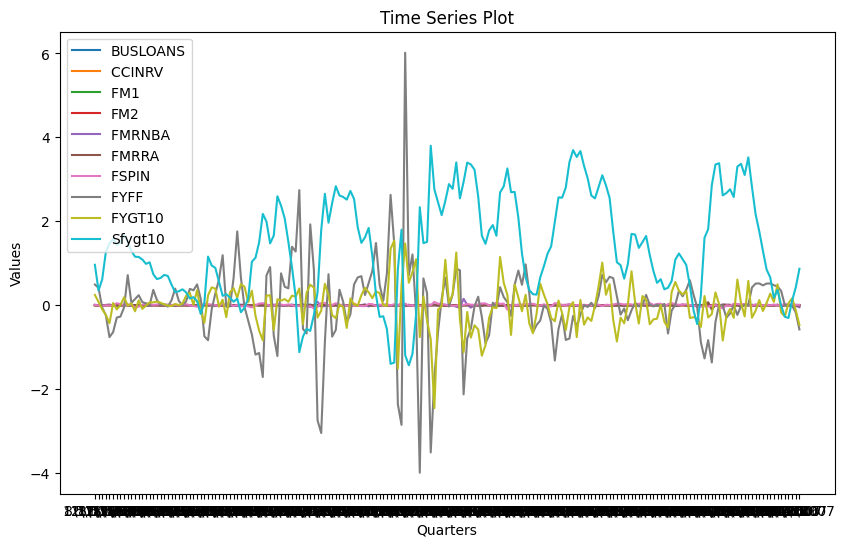

In [8]:
plt.figure(figsize=(10, 6))

for column in dat.columns:
    plt.plot(dat.index, dat[column], label=column)

plt.title('Time Series Plot')
plt.xlabel('Quarters')
plt.ylabel('Values')
plt.legend()
plt.show()

In [9]:
import numpy as np
dat_array = np.array(dat.to_numpy())
dat_array.shape

(194, 10)

In [10]:
y = dat_array
n, q = y.shape
p = 4
d = 3
# dimension of x
dim_x = p*q
# construct x
x = np.zeros((n-p, dim_x))
for i in range(p, n, 1):
    x[i-p,:] = y[np.arange(i-1,i-p-1,-1),:].reshape(-1)
yt = y[p:,:]

beta_mddm = ts_mddm(dat_array,p,d)
new_mddm = x @ beta_mddm

beta_rr, AA = reduced_rank(dat_array,p,d)
new_rr = x @ beta_rr

beta_sir = ts_sir(dat_array,p,d)
new_sir = x @ beta_sir


In [11]:
# newx = new_mddm
# plt.figure(figsize=(10,15))

# for i in range(q):
#     for j in range(beta_mddm.shape[1]):
#         plt.subplot(q, beta_mddm.shape[1], i * beta_mddm.shape[1] + j + 1)
#         plt.scatter(newx[:, j], yt[:, i])
#         # plt.ylabel(cat2[i])
#         plt.xlabel(r'$\beta_{}^T X_t$'.format(j+1))

# plt.tight_layout()

# # plt.savefig('NAPM_6x3.pdf', bbox_inches='tight')
# plt.show()


In [12]:
N,q = y.shape
T = 166
NoTest = N-T
h = 5
p,d = 4,3
## dimension reduction
X = np.zeros((N-p, p*q))
## model fitting
model = "LR"
def choose_model(model):
    black_box = LinearRegression() if model == "LR" else KernelRidge(kernel='rbf', gamma=0.1)
    return black_box

for i in np.arange(p, N, 1):
    X[i-p,:] = y[np.arange(i-1,i-p-1,-1),:].reshape(-1)

ydiff_ols = np.zeros((NoTest-h,q,h))
ydiff_rr = np.zeros((NoTest-h,q,h))
ydiff_mddm = np.zeros((NoTest-h,q,h))
ydiff_lasso = np.zeros((NoTest-h,q,h))
ydiff_sir = np.zeros((NoTest-h,q,h))
ydiff_var = np.zeros((NoTest-h,q,h))


for j in range(NoTest-h):
# j = 0 # rolling window step
    Yt = y[j:(T+j),:]
    Ytrain = y[(p+j):(T+j),:]
    Xtrain = X[j:(T-p+j),:]

    Ytrue = y[(T+j):(T+j+h),:]
    # Ytest_ols = y[(T-p+j):(T+j+h),:].copy()
    Ytest_rr = y[(T-p+j):(T+j+h),:].copy()
    Ytest_mddm = y[(T-p+j):(T+j+h),:].copy()
    Ytest_lasso = y[(T-p+j):(T+j+h),:].copy()
    Ytest_sir = y[(T-p+j):(T+j+h),:].copy()
    Ytest_var = y[(T-p+j):(T+j+h),:].copy()

    # Xtest_ols = np.zeros((h, p*q))
    Xtest_rr = np.zeros((h, p*q))
    Xtest_mddm = np.zeros((h, p*q))
    Xtest_sparse = np.zeros((h, p*q))
    Xtest_sir = np.zeros((h, p*q))
    Xtest_var = np.zeros((h, p*q))

    
    model = VAR(Yt)
    results = model.fit(maxlags=4, ic='aic')

    # B_rr, A = reduced_rank(Yt, p, d)
    B_rr = time_series_reduced_rank_regression(Yt, d, p)
    B_mddm = ts_mddm(Yt, p, d)
    B_lasso = smddm_l1(Yt, p, d)[0]
    B_sir = ts_sir(Yt,p, d)
    B_var = VAR_highdim(Yt, p, lam = 0.01)

    reduced_xtr =  Xtrain @ B_mddm
    kernel_mddm = choose_model(model)
    kernel_mddm.fit(reduced_xtr, Ytrain)

    reduced_xtr_lasso =  Xtrain @ B_lasso
    kernel_lasso = choose_model(model)
    kernel_lasso.fit(reduced_xtr_lasso, Ytrain)

    reduced_xtr_sir =  Xtrain @ B_sir
    kernel_sir = choose_model(model)
    kernel_sir.fit(reduced_xtr_sir, Ytrain)

    Ypred = results.forecast(Yt[-results.k_ar:], steps=5)
    for k in range(h):
        ydiff_ols[j,:,k] = Ypred[k,:] - Ytrue[k,:]

    for k in range(h):       
        Xtest_rr[k,:] = Ytest_rr[np.arange(p-1+k,-1+k,-1),:].reshape(-1)
        X_next = Xtest_rr[k,:]
        Ytest_rr[p+k,:] = (B_rr.T @ X_next).reshape(-1)
        ydiff_rr[j,:,k] = Ytest_rr[p+k,:] - Ytrue[k,:]

        Xtest_mddm[k,:] = Ytest_mddm[np.arange(p-1+k,-1+k,-1),:].reshape(-1)
        reduced_xtest = B_mddm.T @ Xtest_mddm[k,:]
        Ytest_mddm[p+k,:] = kernel_mddm.predict(reduced_xtest.reshape((1,-1)))
        ydiff_mddm[j,:,k] = Ytest_mddm[p+k,:] - Ytrue[k,:]


        Xtest_sparse[k,:] = Ytest_lasso[np.arange(p-1+k,-1+k,-1),:].reshape(-1)
        reduced_xtest_lasso = B_lasso.T @ Xtest_sparse[k,:]
        Ytest_lasso[p+k,:] = kernel_lasso.predict(reduced_xtest_lasso.reshape((1,-1)))
        ydiff_lasso[j,:,k] = Ytest_lasso[p+k,:] - Ytrue[k,:]

        Xtest_sir[k,:] = Ytest_sir[np.arange(p-1+k,-1+k,-1),:].reshape(-1)
        reduced_xtest_sir = B_sir.T @ Xtest_sir[k,:]
        Ytest_sir[p+k,:] = kernel_sir.predict(reduced_xtest_sir.reshape((1,-1)))
        ydiff_sir[j,:,k] = Ytest_sir[p+k,:] - Ytrue[k,:]

        Xtest_var[k,:] = Ytest_var[np.arange(p-1+k,-1+k,-1),:].reshape(-1)
        X_next = Xtest_var[k,:]
        Ytest_var[p+k,:] = (B_var.T @ X_next).reshape(-1)
        ydiff_var[j,:,k] = Ytest_var[p+k,:] - Ytrue[k,:]

output = np.zeros(10*h)

output[:h] = np.mean(ydiff_ols**2, axis=(0,1))
output[h:(2*h)] = np.mean(ydiff_rr**2, axis=(0,1)) 
output[(2*h):(3*h)] = np.mean(ydiff_var**2, axis=(0,1))
output[(3*h):(4*h)] = np.mean(ydiff_mddm**2, axis=(0,1))
output[(4*h):(5*h)] = np.mean(ydiff_lasso**2, axis=(0,1))
# output[(4*h):(5*h)] = np.mean(ydiff_sir**2, axis=(0,1))

output[(5*h):(6*h)] = np.mean(np.abs(ydiff_ols), axis=(0,1)) 
output[(6*h):(7*h)] = np.mean(np.abs(ydiff_rr), axis=(0,1)) 
output[(7*h):(8*h)] = np.mean(np.abs(ydiff_var), axis=(0,1)) 
output[(8*h):(9*h)] = np.mean(np.abs(ydiff_mddm), axis=(0,1))
output[(9*h):(10*h)] = np.mean(np.abs(ydiff_lasso), axis=(0,1))
output

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worker

array([0.080923  , 0.10823208, 0.1345196 , 0.14665812, 0.15481972,
       0.09181084, 0.13947106, 0.19317115, 0.23443702, 0.24768217,
       0.05959226, 0.12184047, 0.14978621, 0.20330151, 0.22292186,
       0.10846334, 0.13507199, 0.20398572, 0.2291227 , 0.19595208,
       0.06091744, 0.08708775, 0.10366229, 0.12965109, 0.14234808,
       0.12375638, 0.14665772, 0.16435951, 0.16019618, 0.15803639,
       0.13226537, 0.15348671, 0.17000273, 0.17903925, 0.18122152,
       0.10984146, 0.14654006, 0.14836242, 0.16538329, 0.17079221,
       0.15606123, 0.1641331 , 0.19431261, 0.18525362, 0.17119076,
       0.10606482, 0.12053116, 0.1308301 , 0.14251994, 0.14979755])

In [13]:
output.reshape(-1,h)

array([[0.080923  , 0.10823208, 0.1345196 , 0.14665812, 0.15481972],
       [0.09181084, 0.13947106, 0.19317115, 0.23443702, 0.24768217],
       [0.05959226, 0.12184047, 0.14978621, 0.20330151, 0.22292186],
       [0.10846334, 0.13507199, 0.20398572, 0.2291227 , 0.19595208],
       [0.06091744, 0.08708775, 0.10366229, 0.12965109, 0.14234808],
       [0.12375638, 0.14665772, 0.16435951, 0.16019618, 0.15803639],
       [0.13226537, 0.15348671, 0.17000273, 0.17903925, 0.18122152],
       [0.10984146, 0.14654006, 0.14836242, 0.16538329, 0.17079221],
       [0.15606123, 0.1641331 , 0.19431261, 0.18525362, 0.17119076],
       [0.10606482, 0.12053116, 0.1308301 , 0.14251994, 0.14979755]])